In [1]:
import os
import numpy as np

In [2]:
import csv
import numpy as np
import pandas as pd
import plotly.offline as plt
import plotly.graph_objs as go
import matplotlib.pyplot as mtp

In [3]:
data = pd.read_csv(r"Data_Points.csv")
print(data)

      Limitied_CPU  Limited_Mem  Auto Scalabilty  Multi Host  Rolling Update  \
0                6            4                5           0               2   
1                6            4                5           0               2   
2                6            4                5           0               3   
3                6            4                5           0               3   
4                6            4                5           0               1   
...            ...          ...              ...         ...             ...   
5035             0            2                1           3               6   
5036             0            2                1           3               5   
5037             0            2                1           3               5   
5038             0            2                1           3               4   
5039             0            2                1           3               4   

      Load Balancing  Delay Requirement

In [4]:
x= data.iloc[:, 0:7].values  
y= data.iloc[:, 7:8].values 
print(x.shape)
print(y.shape)
print(x)
print(y)

(5040, 7)
(5040, 1)
[[6 4 5 ... 2 1 3]
 [6 4 5 ... 2 3 1]
 [6 4 5 ... 3 1 2]
 ...
 [0 2 1 ... 5 6 4]
 [0 2 1 ... 4 5 6]
 [0 2 1 ... 4 6 5]]
[[0]
 [0]
 [0]
 ...
 [0]
 [1]
 [0]]


In [5]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0)  

In [6]:
#feature Scaling  
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)  

In [7]:
#Fitting Logistic Regression to the training set  
from sklearn.linear_model import LogisticRegression  
classifier= LogisticRegression(random_state=0)  
model=classifier.fit(x_train, y_train)  

/usr/lib/python3/dist-packages/sklearn/utils/validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [8]:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,  
                   intercept_scaling=1, l1_ratio=None, max_iter=100,  
                   multi_class='warn', n_jobs=None, penalty='l2',  
                   random_state=0, solver='warn', tol=0.0001, verbose=0,  
                   warm_start=False)  

LogisticRegression(multi_class='warn', random_state=0, solver='warn')

In [9]:
#Predicting the test set result  
y_pred= classifier.predict(x_test)
temp1 = classifier.predict_proba(x_test)
print(y_pred)
print(temp1[:,1])
print(np.unique(temp1[:,1]))

[1 0 1 ... 1 0 1]
[9.52625291e-01 1.33239353e-03 9.92092646e-01 ... 9.99921187e-01
 8.89071757e-07 9.45456130e-01]
[1.77757935e-09 1.80020366e-09 1.83538319e-09 ... 9.99999713e-01
 9.99999716e-01 9.99999719e-01]


Accuracy

In [10]:
classifier.score(x_test, y_test)

0.9571428571428572

CV Mean


In [11]:
from sklearn.model_selection import cross_val_score
#train model with cv of 5 
cv_scores = cross_val_score(classifier, x, y, cv=5)
#print each cv score (accuracy) and average them
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

/usr/lib/python3/dist-packages/sklearn/utils/validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/lib/python3/dist-packages/sklearn/utils/validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/lib/python3/dist-packages/sklearn/utils/validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[0.91666667 0.98710317 0.93948413 0.97519841 0.9047619 ]
cv_scores mean:0.9446428571428571


/usr/lib/python3/dist-packages/sklearn/utils/validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/lib/python3/dist-packages/sklearn/utils/validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Precision & Recall

In [12]:
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

average_precision = average_precision_score(y_test, temp1[:,1])

print('Average precision score: {0:0.2f}'.format(average_precision))


precision_val = precision_score(y_test, y_pred, average="binary")
print("Precision:",precision_val)

recall_val = recall_score(y_test, y_pred, average="binary")
print("Recall:",recall_val)

Average precision score: 0.99
Precision: 0.9357277882797732
Recall: 0.9611650485436893


Precision-Recall Curve

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


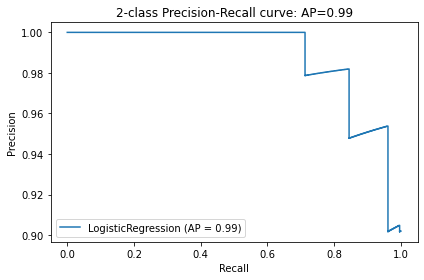

In [13]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

disp = plot_precision_recall_curve(classifier, x_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

plt.tight_layout()
plt.savefig('Logistic_P_P-R.eps', format='eps')

Confusion Matrix

In [14]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test,y_pred)
print(cm)  

[[711  34]
 [ 20 495]]


Plot CM

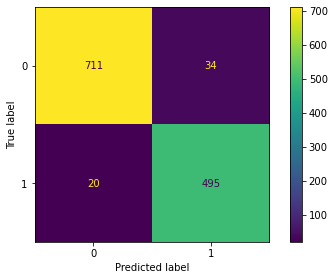

In [15]:
import matplotlib.pyplot as plt 
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier, x_test, y_test)
plt.tight_layout()
plt.savefig('Logistic_P_CM.eps', format='eps')

In [16]:
predicted= classifier.predict([[0,1,1,0,1,1,0]])
print(predicted)

[0]
